In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

### Dataset
We used a realestate dataset from Kaggle to produce this reduced dataset. This dataset contains the _sale price_ and _above ground square feet_ of many houses. We can use this data for our linear regression.

We use Pandas to read the data file which is stored as Comma Separated Values (CSV). and print the column labels. CSV files are similar to excel sheets.

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


Now pandas provides some helpful tools for us to inspect our data. It provides a `plot()` function that, behind the scenes, is calling into the _Matplotlib_ library and calling the function [matplotlib.pyplot.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). In this case, we simply tell it the names of the columns we want as our _x_ and _y_ values and the `style` (`'.'` tells `matplotlib` to use a small dot to represent each data point).

<AxesSubplot: xlabel='GrLivArea'>

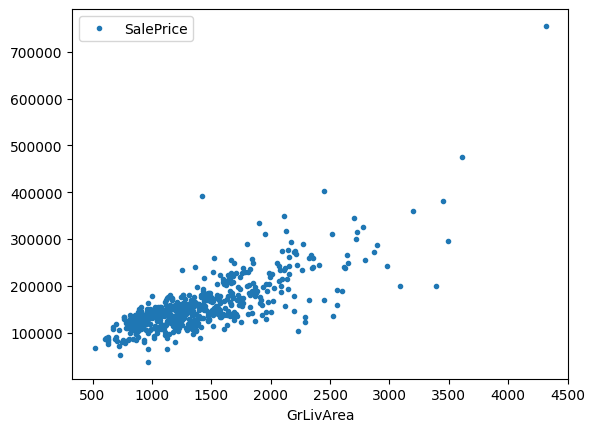

In [3]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [4]:
def model(x,m,b):
    return m * x + b

In [5]:
def loss(x,y,m,b):
    y_predicted = model(x,m,b)
    return np.power( y - y_predicted, 2 )

In [6]:
def updated_m(x,y,m,b,learning_rate):
    dL_dm = - 2 * x * (y - model(x,m,b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
    dL_db = - 2 * (y - model(x,m,b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db

In [7]:
def run_training(m = 5., 
                 b = 1000., 
                 batch_size = 32, 
                 learning_rate_m = 1e-7, 
                 learning_rate_b = 1e-1
                ):
    
    loss_history = []
    idxs = np.arange(len(data))
    np.random.default_rng(12).shuffle(idxs)

    epochs = 10
    for i in range(1, epochs + 1):
        batch_loss = []
        for j in range(len(data) // batch_size + 1):
            start = batch_size * j
            end = batch_size * (j + 1)
            if len(data) < end:
                end = -1
            idx = idxs[start:end]

            data_x = data['GrLivArea'].iloc[idx].to_numpy()
            data_y = data['SalePrice'].iloc[idx].to_numpy()

            m = updated_m(data_x, data_y, m, b, learning_rate_m)
            b = updated_b(data_x, data_y, m, b, learning_rate_b)

            loss_value = np.mean(loss(data_x, data_y, m, b))
            batch_loss.append(loss_value)
        
        loss_value = np.mean(np.array(batch_loss))
        loss_history.append(loss_value)

        # print our progress
        print('[%03d]  y_i = %.2f * x + %.2f   loss: %f' % (i,  m, b, loss_value))
    
    data_x = data['GrLivArea'].to_numpy()
    data_y = data['SalePrice'].to_numpy()
    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m + b
    ax[0].scatter(data_x, data_y)
    ax[0].plot(line_x, line_y, 'b-', label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.title(f'Batch size = {batch_size}')
    plt.show()

### Part 1: Batch Size

[001]  y_i = 78.93 * x + 29630.37   loss: 1759277962.060613
[002]  y_i = 78.67 * x + 30034.74   loss: 1398145277.333801
[003]  y_i = 78.48 * x + 30318.90   loss: 1397985766.641237
[004]  y_i = 78.35 * x + 30518.59   loss: 1397889645.208264
[005]  y_i = 78.26 * x + 30658.93   loss: 1397829973.904719
[006]  y_i = 78.20 * x + 30757.55   loss: 1397791930.523338
[007]  y_i = 78.15 * x + 30826.85   loss: 1397767116.954880
[008]  y_i = 78.12 * x + 30875.56   loss: 1397750628.128662
[009]  y_i = 78.10 * x + 30909.78   loss: 1397739509.233938
[010]  y_i = 78.08 * x + 30933.84   loss: 1397731926.867707


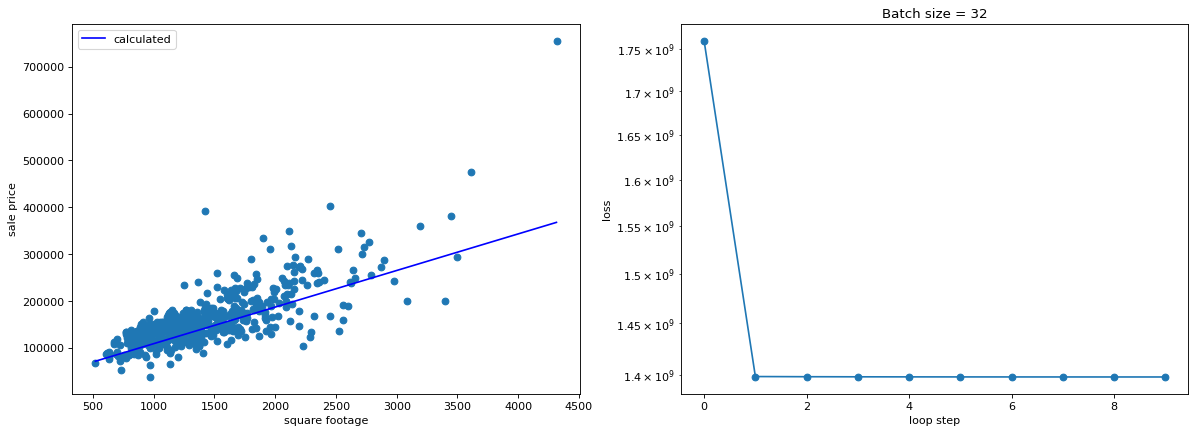

[001]  y_i = 88.88 * x + 31983.21   loss: 2146379833.773296
[002]  y_i = 88.56 * x + 32572.14   loss: 1431215347.466686
[003]  y_i = 88.24 * x + 33044.50   loss: 1430777159.296819
[004]  y_i = 87.98 * x + 33438.02   loss: 1430476044.060348
[005]  y_i = 87.76 * x + 33765.87   loss: 1430259487.196607
[006]  y_i = 87.57 * x + 34039.02   loss: 1430102875.591238
[007]  y_i = 87.42 * x + 34266.58   loss: 1429988923.344702
[008]  y_i = 87.29 * x + 34456.18   loss: 1429905456.828538
[009]  y_i = 87.18 * x + 34614.13   loss: 1429843880.135417
[010]  y_i = 87.10 * x + 34745.73   loss: 1429798105.060245


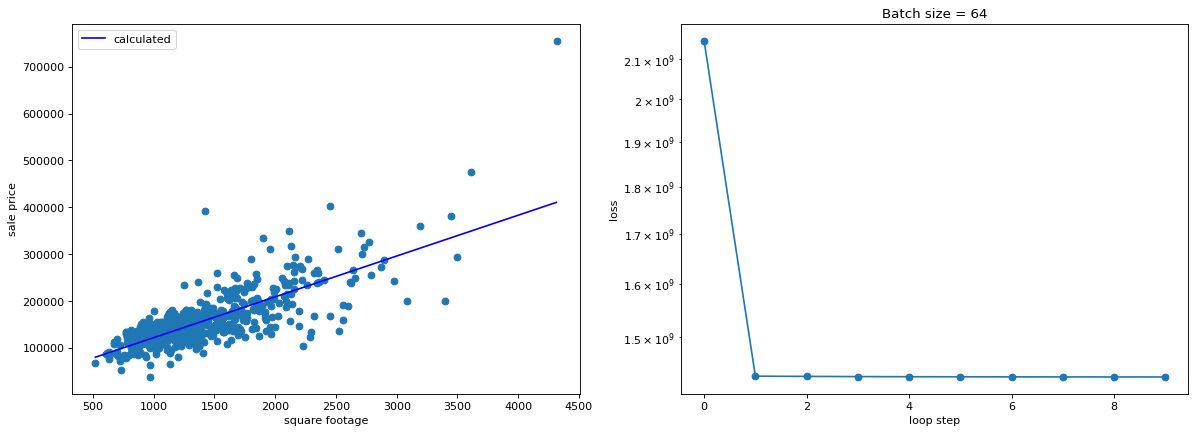

[001]  y_i = 86.35 * x + 30839.99   loss: 2662680787.204119
[002]  y_i = 87.44 * x + 32066.73   loss: 1413548622.948991
[003]  y_i = 87.06 * x + 32687.24   loss: 1410935632.458022
[004]  y_i = 86.69 * x + 33238.57   loss: 1410019492.473082
[005]  y_i = 86.35 * x + 33736.48   loss: 1409280512.093196
[006]  y_i = 86.05 * x + 34186.30   loss: 1408670260.090143
[007]  y_i = 85.77 * x + 34592.67   loss: 1408165473.493824
[008]  y_i = 85.53 * x + 34959.80   loss: 1407747407.806969
[009]  y_i = 85.30 * x + 35291.47   loss: 1407400707.604624
[010]  y_i = 85.10 * x + 35591.11   loss: 1407112783.718009


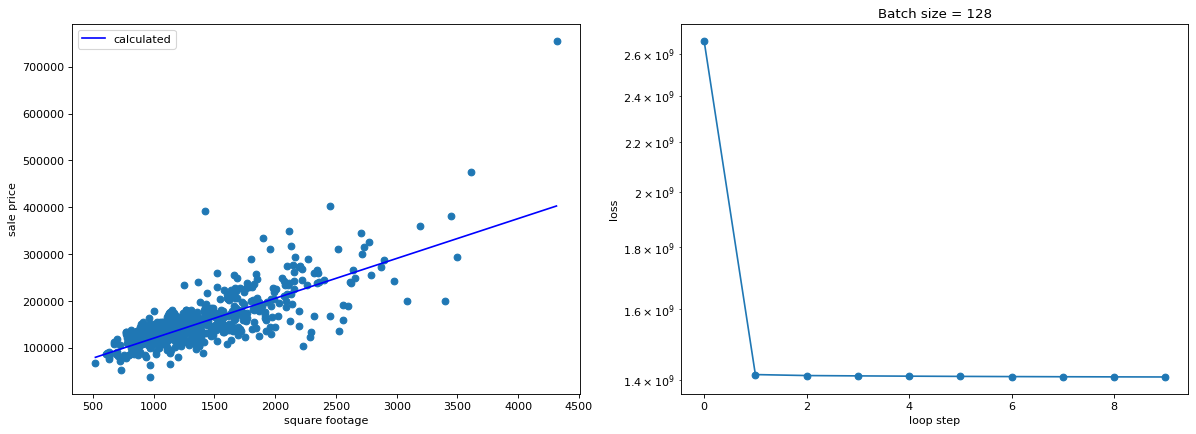

[001]  y_i = 79.63 * x + 28269.89   loss: 3260472005.854075
[002]  y_i = 86.46 * x + 31517.35   loss: 1375698411.947738
[003]  y_i = 86.74 * x + 32399.15   loss: 1351775592.533955
[004]  y_i = 86.40 * x + 33018.33   loss: 1349396586.010490
[005]  y_i = 86.03 * x + 33580.84   loss: 1347785542.339866
[006]  y_i = 85.67 * x + 34108.49   loss: 1346383335.888431
[007]  y_i = 85.33 * x + 34605.12   loss: 1345132637.802011
[008]  y_i = 85.01 * x + 35072.70   loss: 1344013622.751773
[009]  y_i = 84.71 * x + 35512.95   loss: 1343011642.582648
[010]  y_i = 84.43 * x + 35927.47   loss: 1342113968.148673


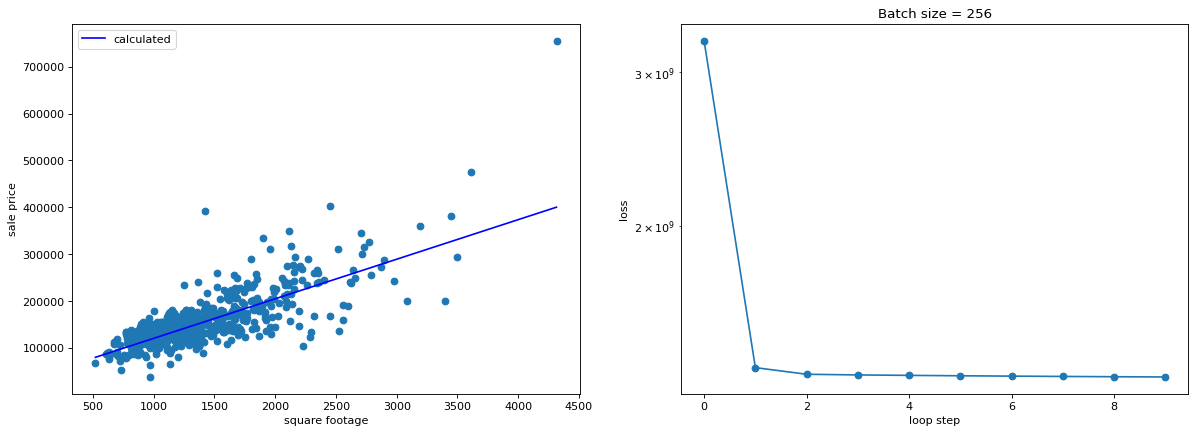

[001]  y_i = 68.62 * x + 25559.98   loss: 4111358153.163318
[002]  y_i = 82.20 * x + 31430.78   loss: 1410598591.366515
[003]  y_i = 84.84 * x + 33194.64   loss: 1273506091.221232
[004]  y_i = 85.10 * x + 34041.57   loss: 1263353011.543994
[005]  y_i = 84.86 * x + 34669.97   loss: 1260384030.339756
[006]  y_i = 84.52 * x + 35233.30   loss: 1258132129.013359
[007]  y_i = 84.16 * x + 35765.78   loss: 1256111155.960485
[008]  y_i = 83.82 * x + 36275.56   loss: 1254249477.609619
[009]  y_i = 83.48 * x + 36765.03   loss: 1252525030.670426
[010]  y_i = 83.16 * x + 37235.32   loss: 1250925428.076161


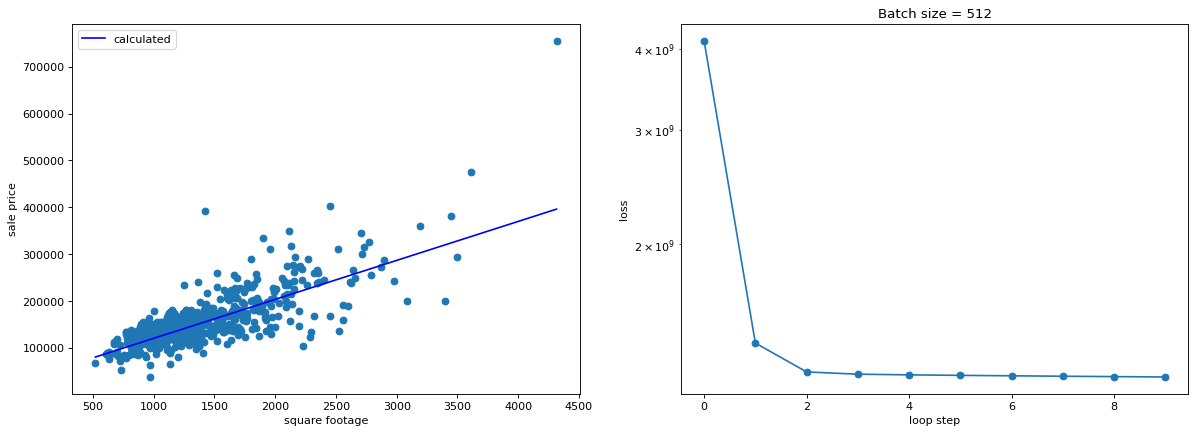

In [8]:
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    run_training(batch_size = batch_size)

### Part 2: Learning Rate

[001]  y_i = 88.88 * x + 31983.21   loss: 2146379833.773296
[002]  y_i = 88.56 * x + 32572.14   loss: 1431215347.466686
[003]  y_i = 88.24 * x + 33044.50   loss: 1430777159.296819
[004]  y_i = 87.98 * x + 33438.02   loss: 1430476044.060348
[005]  y_i = 87.76 * x + 33765.87   loss: 1430259487.196607
[006]  y_i = 87.57 * x + 34039.02   loss: 1430102875.591238
[007]  y_i = 87.42 * x + 34266.58   loss: 1429988923.344702
[008]  y_i = 87.29 * x + 34456.18   loss: 1429905456.828538
[009]  y_i = 87.18 * x + 34614.13   loss: 1429843880.135417
[010]  y_i = 87.10 * x + 34745.73   loss: 1429798105.060245


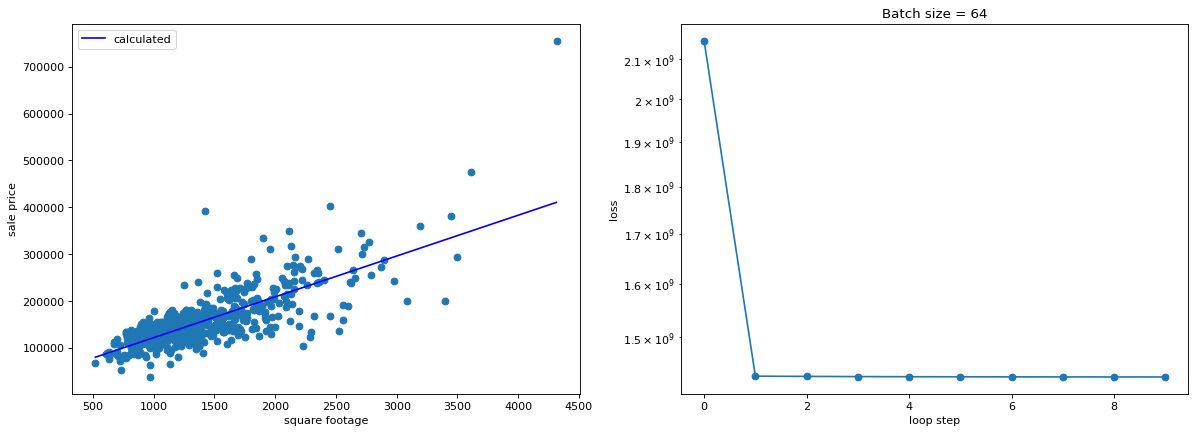

[001]  y_i = 97.73 * x + 15296.65   loss: 1512245958.421568
[002]  y_i = 94.19 * x + 20375.49   loss: 1449614289.391586
[003]  y_i = 91.42 * x + 24346.09   loss: 1429458025.697624
[004]  y_i = 89.25 * x + 27450.27   loss: 1416990482.601827
[005]  y_i = 87.56 * x + 29877.09   loss: 1409254579.214605
[006]  y_i = 86.23 * x + 31774.36   loss: 1404435904.653212
[007]  y_i = 85.20 * x + 33257.63   loss: 1401419983.049963
[008]  y_i = 84.39 * x + 34417.23   loss: 1399521339.930692
[009]  y_i = 83.76 * x + 35323.80   loss: 1398317645.790513
[010]  y_i = 83.26 * x + 36032.55   loss: 1397548139.862439


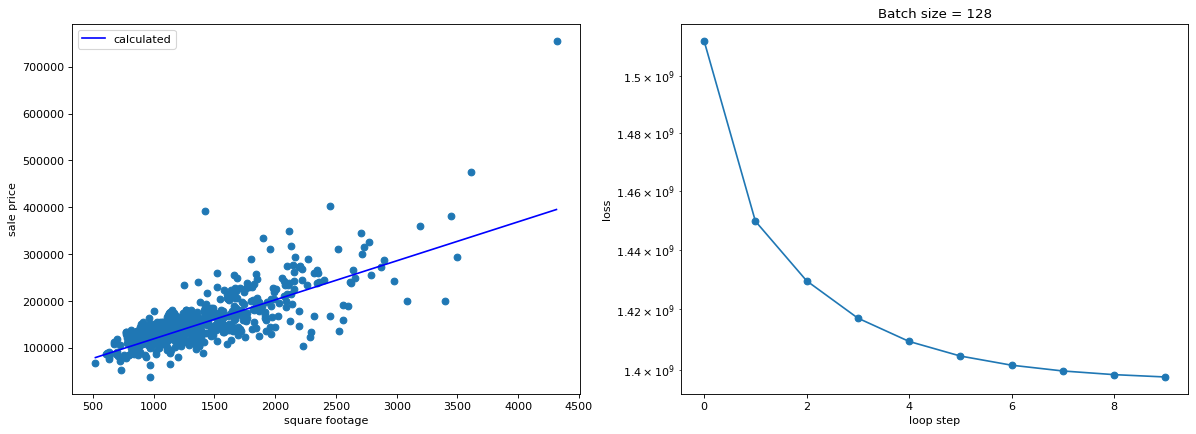

[001]  y_i = 148.28 * x + -52474.56   loss: 3845181358.519711
[002]  y_i = 120.12 * x + -14752.27   loss: 1952807440.957026
[003]  y_i = 103.44 * x + 8016.35   loss: 1573745507.639319
[004]  y_i = 93.22 * x + 21979.90   loss: 1424604937.634539
[005]  y_i = 86.95 * x + 30542.32   loss: 1364796169.422469
[006]  y_i = 83.10 * x + 35792.79   loss: 1340018844.812838
[007]  y_i = 80.74 * x + 39012.37   loss: 1329298973.299680
[008]  y_i = 79.30 * x + 40986.61   loss: 1324407673.605067
[009]  y_i = 78.41 * x + 42197.21   loss: 1322040830.093881
[010]  y_i = 77.87 * x + 42939.55   loss: 1320827310.861295


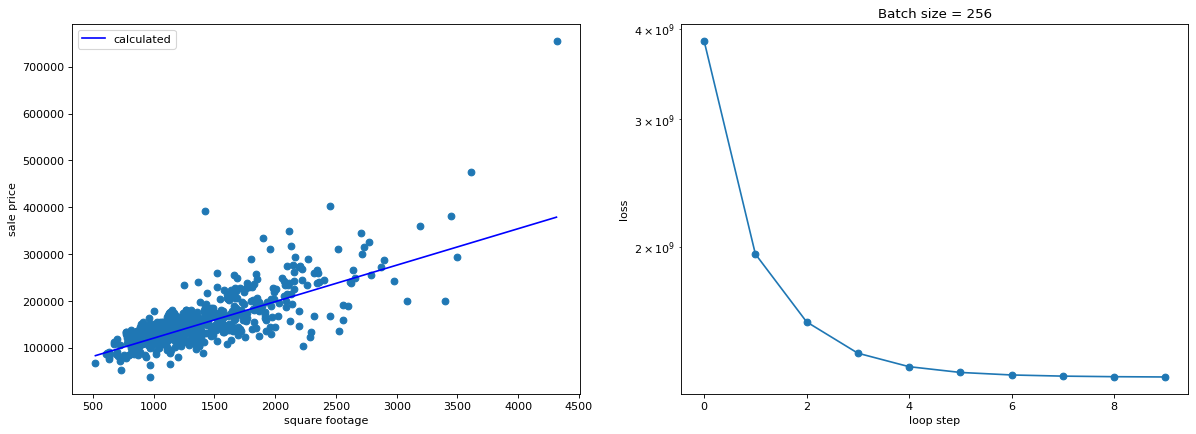

[001]  y_i = 802.27 * x + -1089062.83   loss: 121535546353.467224
[002]  y_i = 354.27 * x + -49861.09   loss: 114098734258.041656
[003]  y_i = -1380.49 * x + 2403193.66   loss: 495980893665.905640
[004]  y_i = -783.87 * x + 720198.46   loss: 507801276928.178894
[005]  y_i = 2918.73 * x + -4675295.50   loss: 2077723869647.659180
[006]  y_i = 2389.27 * x + -2220526.51   loss: 2354079846340.059082
[007]  y_i = -5371.79 * x + 9409470.56   loss: 8394446829345.498047
[008]  y_i = -5753.90 * x + 6544873.05   loss: 11086669656305.691406
[009]  y_i = 10230.12 * x + -18061634.42   loss: 33661681292403.421875
[010]  y_i = 14063.61 * x + -16819533.26   loss: 52819619572179.437500


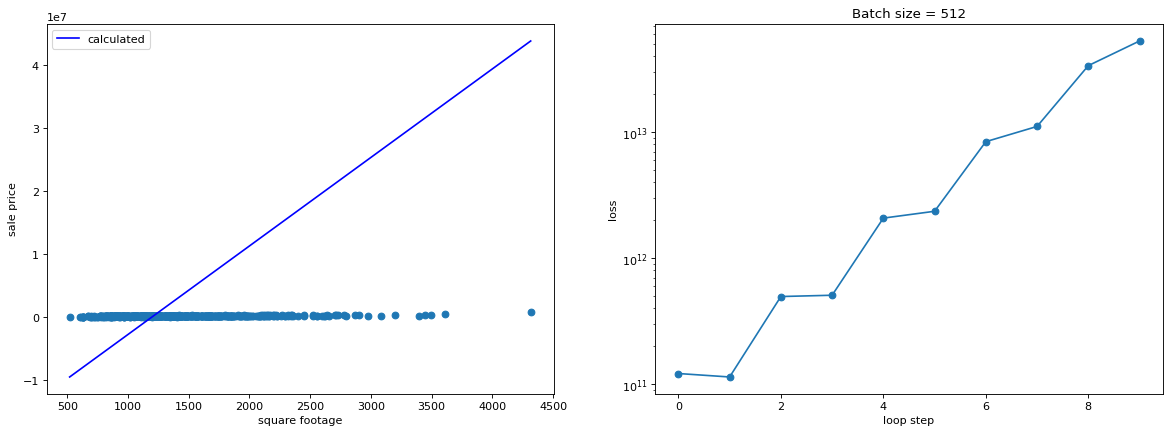

In [9]:
rates = (64, 1e-7, 1e-1)

for multiply in [1, 2, 4, 8]:
    batch_size = rates[0] * multiply
    learning_rate_m = rates[1] * multiply
    learning_rate_b = rates[2] * multiply
    run_training(batch_size = batch_size,
                 learning_rate_m = learning_rate_m,
                 learning_rate_b = learning_rate_b,
                )

# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md